## New York AirBnb data analysis
- data source - https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
### Context
Since its inception in 2008, Airbnb has revolutionized the way people travel, offering a distinctive and personalized approach to experiencing the world. Over the years, Airbnb has evolved into a globally renowned service that caters to both guests and hosts. Central to the company's operations is the extensive data generated by millions of listings on its platform. This vast pool of data serves as a vital resource for Airbnb, enabling them to undertake various critical functions. These include enhancing security measures, making informed business decisions, gaining insights into customer and host behavior and performance, shaping marketing strategies, introducing innovative supplementary services, and much more. In essence, Airbnb's success and continued growth are intrinsically linked to the robust analysis of this wealth of data.
### Data Source and Description
This dataset contains around 49000 observations. Each observation contains of 16 columns which contain both categorical and numerical values. 
- id - Listing ID
- name - Listing Title
- host_id - ID of Host
- host_name - Name of Host
- neighbourhood_group - Borough that contains listing
- neighbourhood - Name of neighbourhood that listing is in
- latitude - latitude of listing
- longitude - longitude of listing
- room_type - Type of public space that is being offered
- price - price per night, USD
- minimum_nights - minimum number of nights required to book listing
- number_of_reviews - total number of reviews that listing has accumulated
- last_review - date in which listing was last rented
- reviews_per_month - total number of reviews divided by the number of months the listing is active
- calculated_host_listings_count - amount of listing per host**
- availability_365 - number of days per year the listing is active
### Acquaring and Loading Data
Demonstrating the Code and Techniques for Data Acquisition, Loading, and Analysis
In this section, we will walk through the process of obtaining the necessary data, loading it into a suitable format for analysis, and providing a detailed explanation of the entire procedure along with the resulting insights.

In [2]:
#importing necessary libraries for future analysis
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.image as mpimg
import nltk
import folium
import string

from matplotlib import pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from folium.plugins import HeatMap
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
# using pandas library built in 'read_csv' function to read csv file with data
df=pd.read_csv(r'C:\Users\xtaym\Desktop\AB_NYC_2019.csv')
# examining first 5 rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# checking the number of records in dataset
len(df)

48895

In [5]:
# checking datatypes
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
# checking count of missing values
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Once we've successfully loaded the AB_2019_NYC dataset and taken a glance at its initial rows, we immediately observe the dataset's richness, consisting of 16 columns that hold a wealth of information. However, it's worth noting that there are some apparent missing values that will necessitate thorough cleaning and treatment of NaN (Not-a-Number) values. As we proceed, we may also find it essential to encode specific values into binary representations (ones and zeros) to facilitate predictive analytics. This dataset promises an exciting journey of in-depth data exploration and analysis.

### Understanding and cleaning the data
We can see that 'name' and 'host_name' are missing only for a few observations. A significant amount of Na's is related to reviews, we will check if it is because the properties do not yet have a review to their name.

In [7]:
(df['number_of_reviews']==0).sum()

10052

As we can see we have exactly the same amount of observations with 0 reviews as review related NA's in our data set. Based on this information i will replace NA's with 0 in reviews_per_month and drop last_review column assuming that they do not have any reviews to their name.

In [8]:
# dropping the column
df.drop(['last_review'],axis=1,inplace=True)
# replacing NA's with 0
df['reviews_per_month']=df['reviews_per_month'].fillna(0)
# examine changes
df.isna().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [9]:
# we will drop rest of NA's because there are only few of them
df=df.dropna()

### Price distribution analysis
Now we will examine some segments by which the data could be group eg. neigourhood_group

In [10]:
print('boroughs:',df['neighbourhood_group'].unique(),'room types:',df['room_type'].unique())

boroughs: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx'] room types: ['Private room' 'Entire home/apt' 'Shared room']


[Text(0.5, 1.0, 'Listings count per room type')]

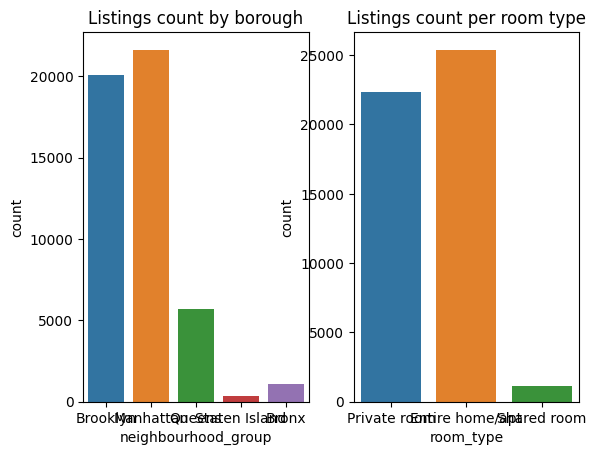

In [11]:
fig, ax =plt.subplots(1,2)
sns.countplot(df,x='neighbourhood_group',ax=ax[0]).set(title='Listings count by borough')
sns.countplot(df,x='room_type',ax=ax[1]).set(title='Listings count per room type')

Listings are split across 5 boroughs. Majority of the observations come from Brooklyn, Manhattan and Queens. When it comes to room types Private rooms and Entire places account for more than 90% of the observations.

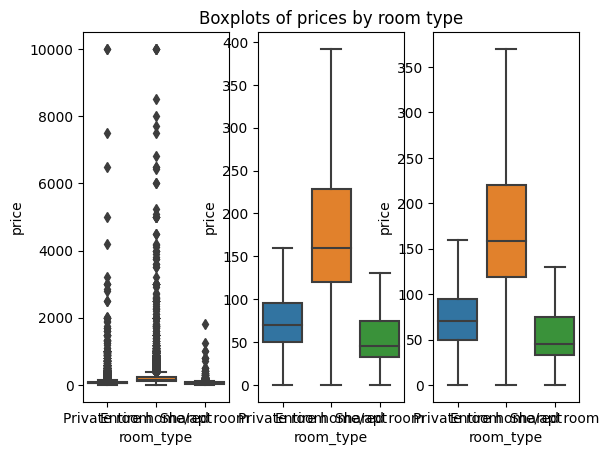

In [12]:
f, axes = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = [18.00, 6.0]
sns.boxplot(y=df['price'],x=df['room_type'],ax=axes[0])
sns.boxplot(y=df['price'],x=df['room_type'],ax=axes[1],showfliers=False).set(title='Boxplots of prices by room type')
df_sub500=df[df['price']<=500]
sns.boxplot(y=df_sub500['price'],x=df_sub500['room_type'],ax=axes[2],showfliers=False)
#sns.boxplot(y=np.log(df_sub500['price']),x=df_sub500['room_type'],ax=axes[3])
plt.rcParams["figure.autolayout"] = True
plt.show()

Entire places are the most expensive followed by private rooms, Shared rooms tend to be the cheapest option when it comes to stay in NYC. Across every category there is a lot of outliers. To combat this we excluded them from the plot. After this transformation we can see that Shared rooms are the cheapest followed by Private rooms while entire places tend to be most expensive. It can also be related to neighbourhood. Our thansformation was usefull and enabled us to better understand price distiburtion. Different approach would be to create a subset of data with max_price set in order to eliminate pricy outliers, another plot was created excluding places with price bigger than 500 USD. Additionally log transformation could also normalize the distribution of values and enable us to get a better understanding of data.

[Text(0.5, 1.0, 'distribution of AIRBNB prices by borough'), Text(0.5, 0, '')]

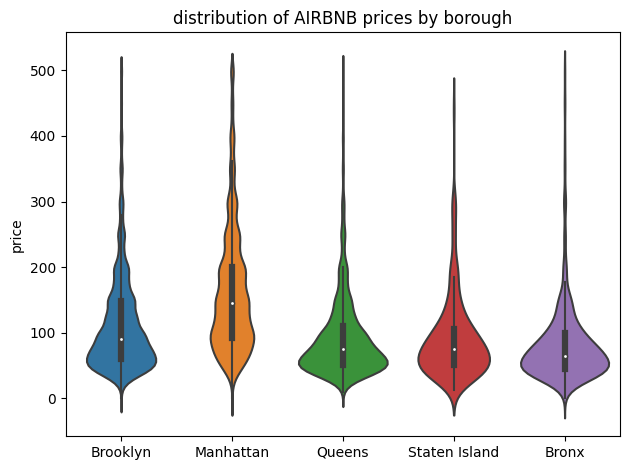

In [13]:
vio_plt=sns.violinplot(data=df_sub500,y='price',x='neighbourhood_group')
vio_plt.set(title='distribution of AIRBNB prices by borough',xlabel='')

We can see that Manhattan is the most expensive, followed by Brooklyn. The rest of the areas are quite similar when it comes to AirBnB prices.

Text(0, 0.5, 'price')

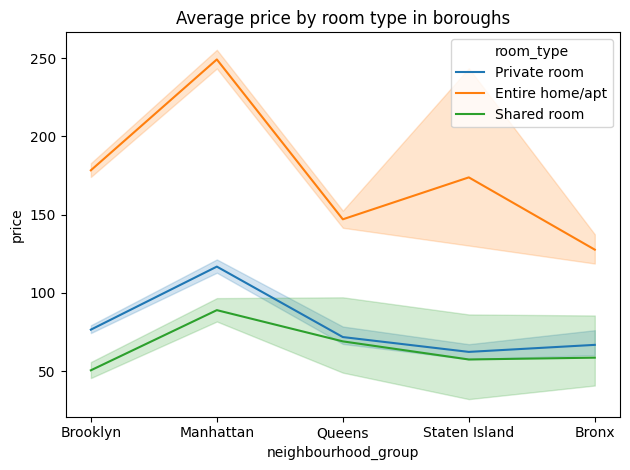

In [14]:
sns.lineplot(data=df,x='neighbourhood_group',y='price',hue='room_type')
plt.title('Average price by room type in boroughs')
plt.ylabel('price')

Manhattan is the most expensive neighbourhood across all categories. Entire places tend to be more expensive across the whole city. We can observe huge variation in values for entire places at staten island it could be related to size of the district and proximity to the city center.

In [15]:
m=folium.Map([40.7128,-74.0060],zoom_start=11,min_zoom=11)
HeatMap(df_sub500[['latitude','longitude','price']].dropna(),radius=11,max_zoom=20,gradient={0.2:'blue',0.4:'purple',0.75:'orange',0.9:'red'}).add_to(m)
display(m)

Heatmap of number of listings and their prices. The 'Hotter' the area the higher amount of listings it has. Pricy ones count more than the least pricy ones.  

In [16]:
#calculatiing number of listings per neighbourhood
df_neigh_count=pd.DataFrame(df[['neighbourhood','neighbourhood_group']].groupby(['neighbourhood','neighbourhood_group']).size()).rename(columns={0:'neigh_count'}).reset_index()
df_neigh_count.sort_values('neigh_count',ascending=False)

,neighbourhood,neighbourhood_group,neigh_count
214,Williamsburg,Brooklyn,3917
13,Bedford-Stuyvesant,Brooklyn,3713
94,Harlem,Manhattan,2655
28,Bushwick,Brooklyn,2462
202,Upper West Side,Manhattan,1969
...,...,...,...
165,Richmondtown,Staten Island,1
215,Willowbrook,Staten Island,1
82,Fort Wadsworth,Staten Island,1
141,New Dorp,Staten Island,1


Text(0.5, 0, 'number of listings in neighbourhood')

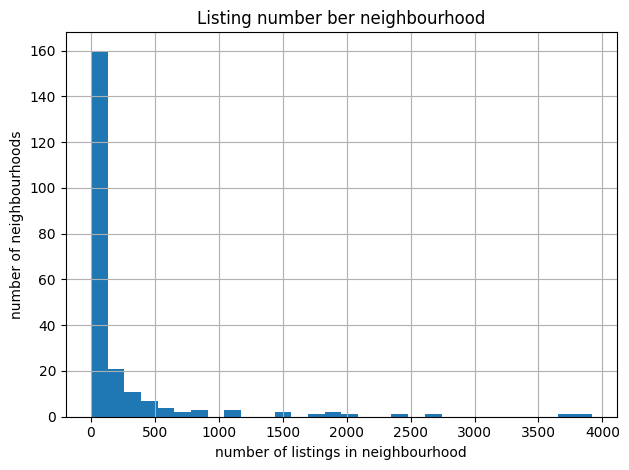

In [17]:
df_neigh_count['neigh_count'].hist(bins=30)
plt.title('Listing number ber neighbourhood')
plt.ylabel('number of neighbourhoods') 
plt.xlabel('number of listings in neighbourhood')

Dataset contains listings from 221 neighbourhoods, some are missing because the real number is closer to ~340. Majority of neighbourhoods have less than 100 listings to their name.

In [18]:
#filtering for neighbourhoods with at least 3 listings
df_neig_min_5=df.groupby('neighbourhood').filter(lambda x: len(x) >= 3)
df_rating=df_neig_min_5[['price','neighbourhood']].groupby('neighbourhood').mean().sort_values('price',ascending=False)
df_rating

,price
neighbourhood,
Tribeca,490.638418
Sea Gate,487.857143
Riverdale,442.090909
Prince's Bay,409.500000
Battery Park City,367.086957
...,...
Bronxdale,57.105263
Soundview,53.466667
Tremont,51.545455


Text(0, 0.5, 'number of neighbourhoods')

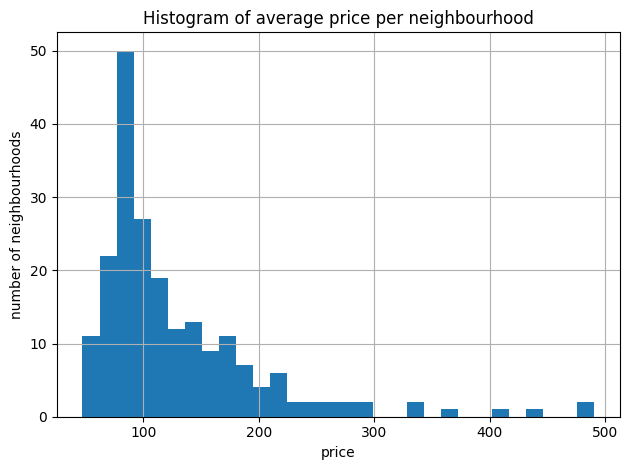

In [19]:
df_rating['price'].hist(bins=30)
plt.title('Histogram of average price per neighbourhood')
plt.xlabel('price') 
plt.ylabel('number of neighbourhoods')

Prices vary across neighbourhoods too with most expensive ones ranging from 300 to 500 USD on average. Usually the prices range from about 60 USD to 150 USD per room/ listing.

In [20]:
pd_neigh_joined=pd.DataFrame(df_rating.reset_index()).merge(df_neigh_count,how='inner',left_on='neighbourhood',right_on='neighbourhood').sort_values('neigh_count',ascending=False)
pd_neigh_joined

,neighbourhood,price,neighbourhood_group,neigh_count
59,Williamsburg,143.826142,Brooklyn,3917
95,Bedford-Stuyvesant,107.688392,Brooklyn,3713
79,Harlem,118.952542,Manhattan,2655
148,Bushwick,84.815597,Brooklyn,2462
22,Upper West Side,210.990350,Manhattan,1969
...,...,...,...,...
80,Huguenot,118.333333,Staten Island,3
189,Graniteville,68.666667,Staten Island,3
20,Breezy Point,213.333333,Queens,3
10,Neponsit,274.666667,Queens,3


Text(0, 0.5, 'count')

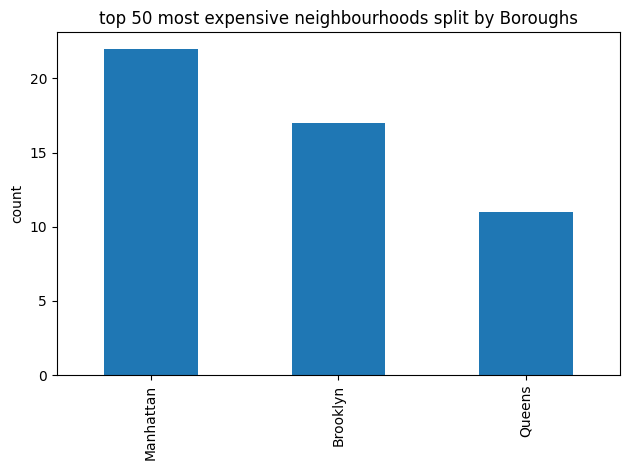

In [21]:
pd_neigh_joined['neighbourhood_group'].head(50).value_counts().plot(kind='bar')
plt.title('top 50 most expensive neighbourhoods split by Boroughs')
plt.xlabel('') 
plt.ylabel('count')

Manhattan is on average the most expensive when it comes to AirBNBs. Same goes for locations in close proximity to it.

### Feature Engineering
We will calculate mean price for room type in each borough, then based on that we will create percent of mean rent column. Based on that we will calculate correlation and explore this further. 

In [22]:
df_mean_neigh=pd.DataFrame(df_sub500[['room_type','neighbourhood_group','price']].groupby(['room_type','neighbourhood_group']).mean().reset_index())
df_mean_reviews=pd.DataFrame(df_sub500[['room_type','neighbourhood_group','number_of_reviews','reviews_per_month']].groupby(['room_type','neighbourhood_group']).mean().reset_index()).rename(columns={'number_of_reviews':'mean_n_of_rev','reviews_per_month':'mean_n_rev_month'})

In [23]:
df_means=pd.DataFrame(df_sub500.reset_index()).merge(df_mean_reviews,how='inner',left_on=('neighbourhood_group','room_type'),right_on=('neighbourhood_group','room_type'))
df_means=df_means.reset_index().merge(df_mean_neigh,how='inner',left_on=('neighbourhood_group','room_type'),right_on=('neighbourhood_group','room_type'))
df_means['mean_price_ratio']=df_means['price_x']/df_means['price_y']
df_means['mean_review_ratio']=df_means['number_of_reviews']/df_means['mean_n_of_rev']
df_means['mean_review_ratio_month']=df_means['reviews_per_month']/df_means['mean_n_rev_month']

,mean_price_ratio,mean_review_ratio,mean_review_ratio_month,reviews_per_month,number_of_reviews,price_x
mean_price_ratio,1.000000,-0.038144,-0.025315,-0.034888,-0.040600,0.726137
mean_review_ratio,-0.038144,1.000000,0.583376,0.569208,0.976960,-0.029888
mean_review_ratio_month,-0.025315,0.583376,1.000000,0.970045,0.574616,-0.004447
reviews_per_month,-0.034888,0.569208,0.970045,1.000000,0.589523,-0.049619
number_of_reviews,-0.040600,0.976960,0.574616,0.589523,1.000000,-0.048272
price_x,0.726137,-0.029888,-0.004447,-0.049619,-0.048272,1.000000


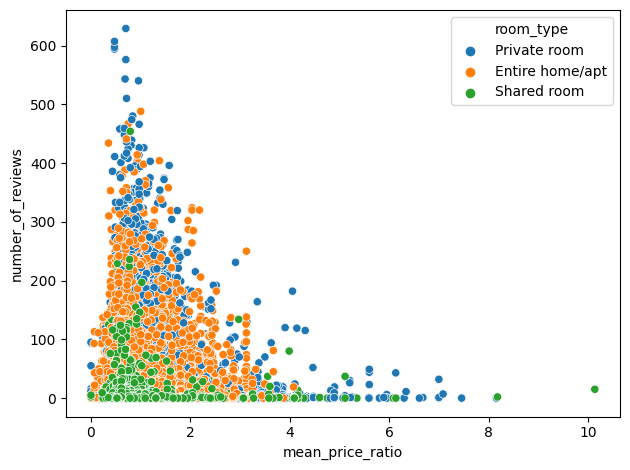

In [24]:
sns.scatterplot(data=df_means,y='number_of_reviews',x='mean_price_ratio',hue='room_type')

df_means[['mean_price_ratio','mean_review_ratio','mean_review_ratio_month','reviews_per_month','number_of_reviews','price_x']].corr()

Price is not related to number of reviews. We have not found one determining factor other than location and room type that influences price. It could be caused by the fact that we do not know nothing about the place standard and capacity, I think that it as important as location of the place. We will discover this further by exploring words contained in titles, they can describe the room standard.

### Measuring title effectiveness


In [25]:
df_sub500.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [26]:
# creating 1 string from titles
def appender(x):
    string=str()
    for i in range(0,len(x)):
        string=string+' '+str(x[i])
    return string

words=appender(df_sub500['name'].reset_index(drop=True))

In [27]:
# filtering stopwords
def process_text(input_text):
    # Tokenize the input text into words
    words = nltk.word_tokenize(input_text)

    # Remove punctuation
    words = [word for word in words if word not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Join the processed words back into a string
    processed_text = ' '.join(words)

    return processed_text

# Example usage:
words = process_text(words)

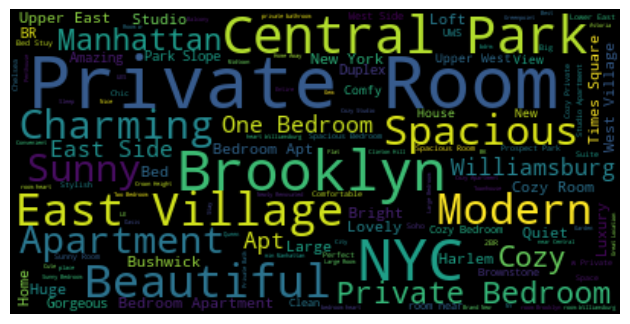

In [28]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(words))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

By using wordcount we can observe most common words appearing in listings 

<Axes: xlabel='word', ylabel='count'>

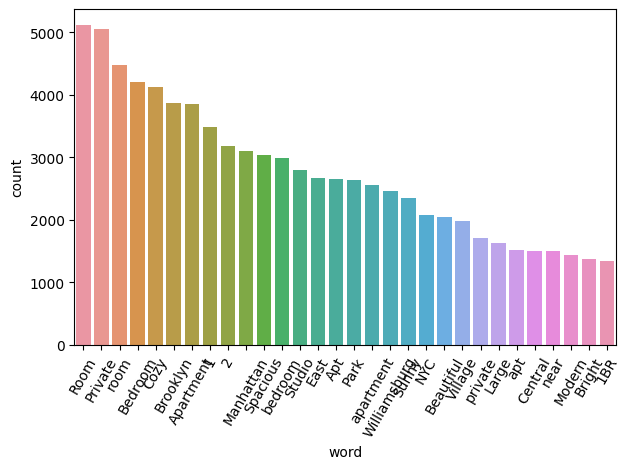

In [29]:
df_words_top=pd.DataFrame(pd.DataFrame(word_tokenize(words)).value_counts(),index=None).reset_index(drop=False).head(30).rename(columns={0:'word'})
plt.xticks(rotation=60)
sns.barplot(df_words_top,x='word',y='count')


Now we know the most popular words in our dataset, now we will check how certain words in title may influence the price of listing. 

In [49]:
## creating bool columns for each word
df_nlp=df_sub500
for word in df_words_top['word']:
    word_df=pd.DataFrame()
    word_df[word] = df_nlp['name'].str.contains(word)

df_nlp=pd.concat([df_nlp,word_df],axis=1)

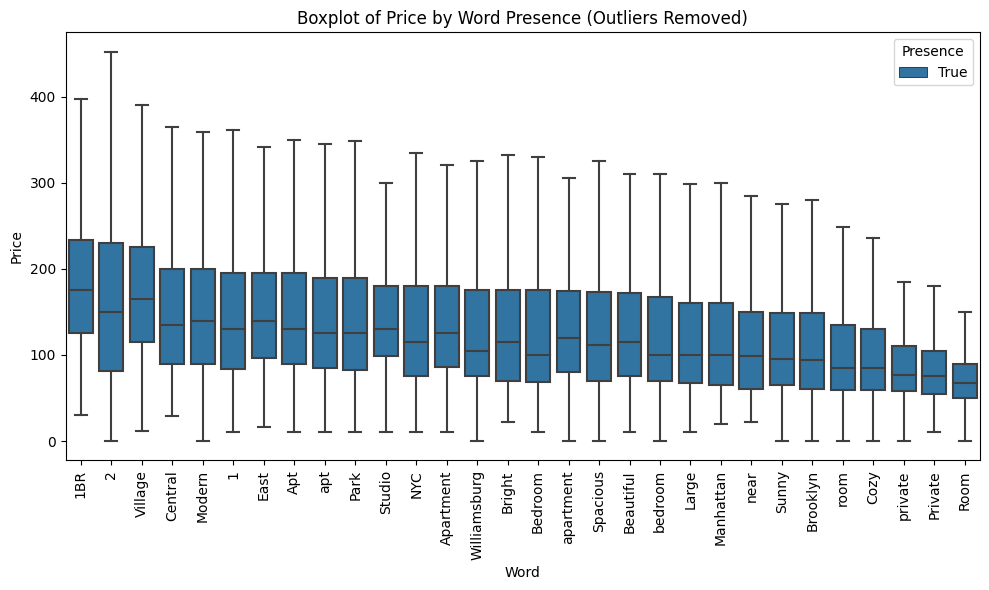

In [424]:
df_melted = pd.melt(df_nlp, id_vars=['price'], value_vars=df_words_top['word'], var_name='Word', value_name='Presence')
df_melted = df_melted[df_melted['Presence'] == 1]
median_prices = df_melted.groupby('Word')['price'].quantile(0.75).sort_values(ascending=False)

# Create a grouped boxplot with outliers removed
plt.figure(figsize=(10, 6))
sns.boxplot(x='Word', y='price', hue='Presence', data=df_melted, showfliers=False, order=median_prices.index)
plt.title('Boxplot of Price by Word Presence (Outliers Removed)')
plt.xlabel('Word')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

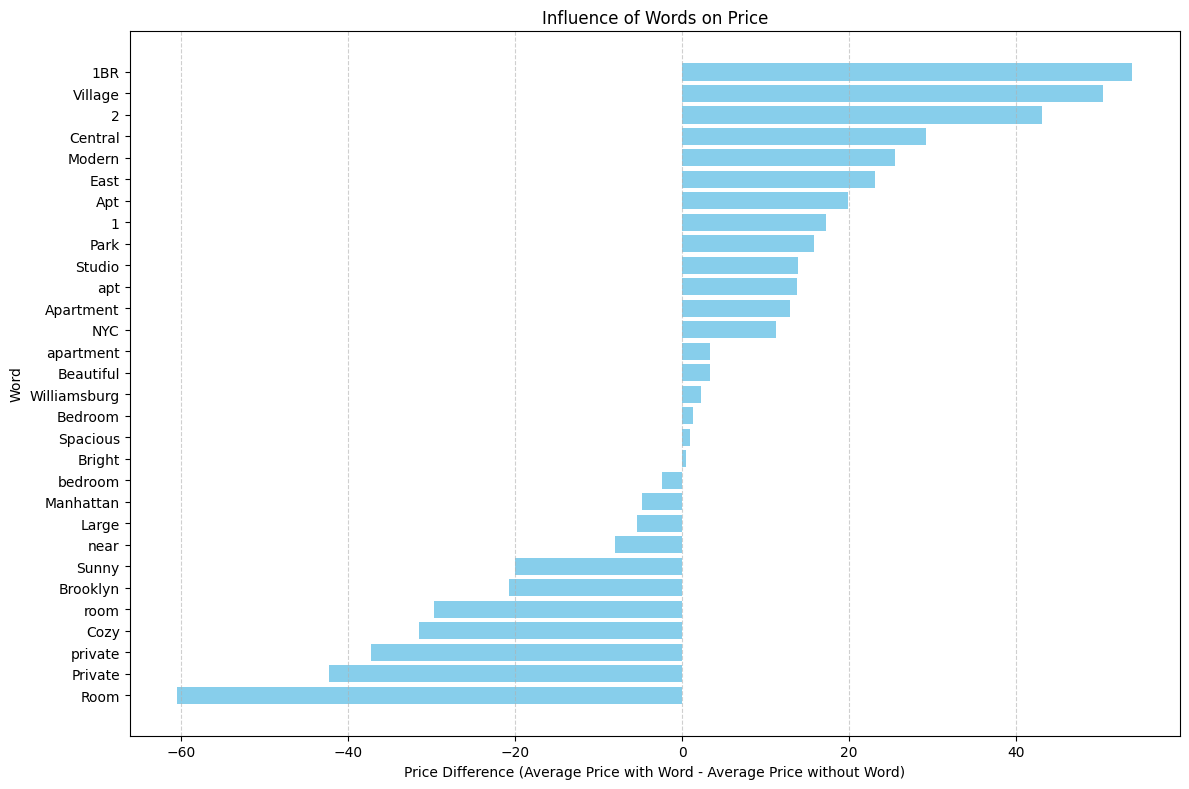

In [433]:


# Create a list of the 30 boolean columns that represent the presence of words
word_columns = df_nlp.columns[-30:]

# Create lists to store the data
words = []
avg_price_with_word = []
avg_price_without_word = []

# Calculate the average price for listings with and without each word
for word_col in word_columns:
    with_word_avg_price = df_nlp[df_nlp[word_col] == True]['price'].mean()
    without_word_avg_price = df_nlp[df_nlp[word_col] == False]['price'].mean()
    words.append(word_col)  # Use the column name as the word (modify as needed)
    avg_price_with_word.append(with_word_avg_price)
    avg_price_without_word.append(without_word_avg_price)

# Create a DataFrame from the lists
word_influence_df = pd.DataFrame({
    'Word': words,
    'Average Price with Word': avg_price_with_word,
    'Average Price without Word': avg_price_without_word
})

# Sort the DataFrame by the influence of the word on price (e.g., by the difference in average price)
word_influence_df['Price Difference'] = word_influence_df['Average Price with Word'] - word_influence_df['Average Price without Word']
word_influence_df = word_influence_df.sort_values(by='Price Difference', ascending=True)

# Create a bar plot to visualize the influence of words on price
plt.figure(figsize=(12, 8))
plt.barh(word_influence_df['Word'], word_influence_df['Price Difference'], color='skyblue')
plt.xlabel('Price Difference (Average Price with Word - Average Price without Word)')
plt.ylabel('Word')
plt.title('Influence of Words on Price')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()


As we can see titlers with certain words have higher average prices than others. Propably it also differs by segment, we would get different results analysing different boroughs and room types. We will check this hypothesis by looking only at private rooms on manhattan. 

In [442]:
df_nlp_hipo=df_nlp[(df_nlp['room_type']=='Private room')&(df_nlp['neighbourhood_group']=='Manhattan')]
df_nlp.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,Beautiful,Village,private,Large,apt,Central,near,Modern,Bright,1BR
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,False,False,False,False,True,False,False,False,False,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,False,False,False,False,False,False,False,False,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,False,False,False,False,False,False,False,False,False,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,False,False,False,False,False,False,False,False,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,False,False,False,False,False,False,False,False,False,False


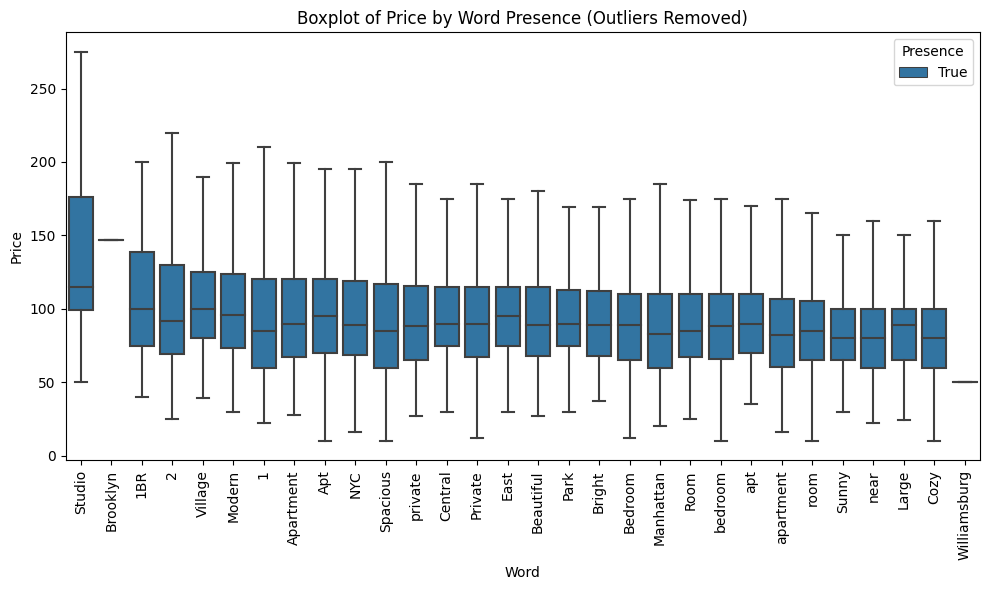

In [447]:
df_meltedv2 = pd.melt(df_nlp_hipo, id_vars=['price'], value_vars=df_words_top['word'], var_name='Word', value_name='Presence')
df_meltedv2 = df_melted[df_melted['Presence'] == 1]
median_prices = df_meltedv2.groupby('Word')['price'].quantile(0.75).sort_values(ascending=False)

# Create a grouped boxplot with outliers removed
plt.figure(figsize=(10, 6))
sns.boxplot(x='Word', y='price', hue='Presence', data=df_meltedv2, showfliers=False, order=median_prices.index)
plt.title('Boxplot of Price by Word Presence (Outliers Removed)')
plt.xlabel('Word')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In this group words have different influence on price, Studio became the most expensive one.